<a href="https://colab.research.google.com/github/sanjayeedith/Hurricane-Prediction-Using-AI-ML/blob/main/How_To_Train_YOLOv5_obb_custom_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#How To Train YOLOv5 Oriented Bounding Boxes Custom Object Detection

Oriented bounding boxes are bounding boxes rotated to better fit the objects represented on an angle. In this notebook, we use the YOLOv5-OBB repository in order to train an already annotated dataset to view the Oriented bounding boxes detection at play.


## Instructions

Run one cell at at time and run:

```
>>> import torch
>>> torch.version.cuda
>>> exit()
```

when prompted to in the first cell.

Addidtional Resources:

- [Yolov5-OBB installation instructions](https://github.com/hukaixuan19970627/yolov5_obb/blob/master/docs/install.md)
- [Getting started](https://github.com/hukaixuan19970627/yolov5_obb/blob/master/docs/GetStart.md)

In [ ]:
!pip3 install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio==0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html
!nvcc -V
!python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
     |██████████████▋                 | 834.1 MB 1.3 MB/s eta 0:13:00tcmalloc: large alloc 1147494400 bytes == 0x3aae8000 @  0x7f5386a6e615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |██████████████████▌             | 1055.7 MB 1.4 MB/s eta 0:09:05tcmalloc: large alloc 1434370048 bytes == 0x7f13e000 @  0x7f5386a6e615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     

In [ ]:
!git clone https://github.com/hukaixuan19970627/yolov5_obb.git

In [ ]:
%cd /content/yolov5_obb/
!pip install -r requirements.txt

/content/yolov5_obb
     |████████████████████████████████| 60.5 MB 1.3 MB/s 
     |████████████████████████████████| 596 kB 3.6 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
%cd utils/nms_rotated
!python setup.py develop  #or "pip install -v -e ."

/content/yolov5_obb/utils/nms_rotated
running develop
running egg_info
creating nms_rotated_ext.egg-info
writing nms_rotated_ext.egg-info/PKG-INFO
writing dependency_links to nms_rotated_ext.egg-info/dependency_links.txt
writing top-level names to nms_rotated_ext.egg-info/top_level.txt
writing manifest file 'nms_rotated_ext.egg-info/SOURCES.txt'
/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py:381: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
writing manifest file 'nms_rotated_ext.egg-info/SOURCES.txt'
running build_ext
/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py:782: UserWarning: The detected CUDA version (11.1) has a minor version mismatch with the version that was used to compile PyTorch (11.3). Most likely this shouldn't be a problem.
  warnings.warn(CUDA_MISMATCH_WARN.format(cuda_str_

In [ ]:
%cd /content
!mkdir /content/datasets/

/content


##Export

Remember to export your annotated dataset following the steps shown [in the video tutorial](https://youtu.be/iRkCNo9-slY?t=136)

In [ ]:
%cd /content/datasets/

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Your_API_Key")
project = rf.workspace("your_workspace_name").project("your_project_name")
dataset = project.version(2).download("yolov5-obb")

/content/datasets
     |████████████████████████████████| 145 kB 40.7 MB/s 
     |████████████████████████████████| 178 kB 66.2 MB/s 
     |████████████████████████████████| 1.1 MB 50.8 MB/s 
     |████████████████████████████████| 67 kB 7.7 MB/s 
     |████████████████████████████████| 54 kB 3.6 MB/s 
     |████████████████████████████████| 138 kB 74.2 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
  Created wheel for roboflow: filename=roboflow-0.2.4-py3-none-any.whl size=21356 sha256=a0d9e71ea221ebea2a24b0cbce3d8658d5ad2a87863739e7f06d76a489aff45b
  Stored in directory: /root/.cache/pip/wheels/b7/2c/60/3733c0e323b1d7aec00f852264314bf6c48192c8e1dc92b3ee
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=80a87ff7e9adffba6b43ad5451aae3ec0d270d40fc3db998b930dc0bbdf6e77a
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built roboflow wget
  Attempting uninstall: urllib3
    Fo

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to ASL-Poly-2 in yolov5-obb:: 100%|██████████| 1349/1349 [00:00<00:00, 1776.70it/s]


## Rename dataset name to roboflow

After running the `!pip install` package, our python.train will expect the dataset name to be `roboflow` (with or without changing the code path below). Make sure to change your cloned dataset folder name to `roboflow` before running the cell below.

In other words, make sure your dataset structure is:

```
parent
├── yolov5
└── datasets
    └── roboflow
        ├── test
        ├── train
        └── valid
            ├── images
                 |────1.jpg
                 |────...
                 └────10000.jpg
            ├── labelTxt
                 |────1.txt
                 |────...
                 └────10000.txt
        └────README.roboflow.txt
        └────data.yaml
```

In [ ]:
%cd /content/yolov5_obb/
!python train.py --data /content/datasets/roboflow/data.yaml --epochs 10 --batch-size 1 --img 1024 --device 0 --exist-ok


/content/yolov5_obb
train: weights=weights/yolov5m.pt, cfg=, data=/content/datasets/roboflow/data.yaml, hyp=data/hyps/obb/hyp.finetune_dota.yaml, epochs=10, batch_size=1, imgsz=1024, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=True, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/hukaixuan19970627/yolov5_obb ✅
YOLOv5 🚀 3f2e708 torch 1.10.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, theta=0.5, theta_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_

In [ ]:
%cd /content/yolov5_obb/

/content/yolov5_obb


In [ ]:
!python detect.py --weights 'runs/train/exp/weights/best.pt' --source '../datasets/roboflow/valid/images' --conf-thres 0.01 --img 416 --device 0 --agnostic

detect: weights=['runs/train/exp/weights/best.pt'], source=../datasets/roboflow/valid/images, imgsz=[416, 416], conf_thres=0.01, iou_thres=0.4, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=True, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 3f2e708 torch 1.10.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 290 layers, 21681339 parameters, 0 gradients, 50.6 GFLOPs
image 1/100 /content/datasets/roboflow/valid/images/A1_jpg.rf.467e301f7decc39d6f77e45ab7614421.jpg: 416x416 1 J, Done. (0.020s)
image 2/100 /content/datasets/roboflow/valid/images/A23_jpg.rf.07a011103d0153dcd03a18761c226699.jpg: 416x416 1 J, Done. (0.020s)
image 3/100 /content/datasets/roboflow/valid/images/A27_jpg.rf.6814a529152cbda95b5d5ff2f0594a96.jpg: 416x416 1 J, Done. (0.020s)
image 4/

In [ ]:
%cd /content/yolov5_obb/runs/detect/exp/

/content/yolov5_obb/runs/detect/exp


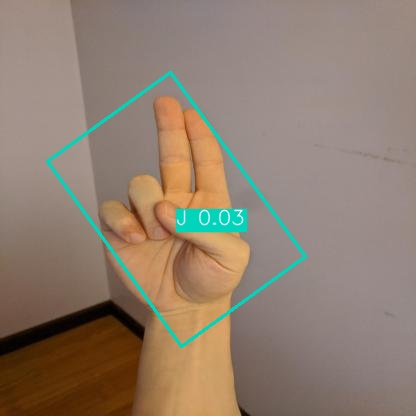

In [ ]:
import os, random
random_file = random.choice(os.listdir("/content/yolov5_obb/runs/detect/exp"))

from IPython.display import Image
Image(random_file)